In [ ]:
!pip3 install torch==1.10.1+cpu torchvision==0.11.2+cpu torchaudio==0.10.1+cpu -f https://download.pytorch.org/whl/cpu/torch_stable.html

Looking in links: https://download.pytorch.org/whl/cpu/torch_stable.html
     |█████████████▍                  | 83.1 MB 3.0 MB/s eta 0:00:39

# Homework 2

In [225]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from google.colab import drive
import sys
import os

# Mount Google Drive
drive.mount('/content/drive')

# Get the absolute path of the current folder
abspath_curr = '/content/drive/My Drive/Statistical Deep Learning/HW1/'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Loading in the Data
A Horizontal Flip and a Grayscale Augmentation was added to one to the training datasets

In [176]:
from torchvision.transforms.transforms import RandomGrayscale
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
print(transform)

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

# Define Augmentation Here
transform_aug = transforms.Compose(
    [transforms.ToTensor(),
     transforms.RandomHorizontalFlip(.5),
     transforms.RandomGrayscale(.5),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
print(transform_aug)

trainset_aug = torchvision.datasets.CIFAR10(root='./data2', train=True,
                                        download=True, transform=transform_aug)
trainloader_aug = torch.utils.data.DataLoader(trainset_aug, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset_aug = torchvision.datasets.CIFAR10(root='./data2', train=False,
                                       download=True, transform=transform)
testloader_aug = torch.utils.data.DataLoader(testset_aug, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Compose(
    ToTensor()
    Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
)
Files already downloaded and verified
Files already downloaded and verified
Compose(
    ToTensor()
    RandomHorizontalFlip(p=0.5)
    RandomGrayscale(p=0.5)
    Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
)
Files already downloaded and verified
Files already downloaded and verified


torch.Size([4, 3072])
torch.Size([4, 3, 32, 32])


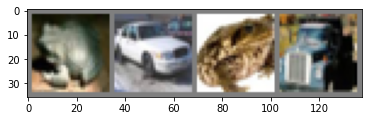

frog  car   frog  truck


In [177]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

#find the dimensions of a flattened image
print(torch.flatten(images, 1).size())
print(images.size())

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

torch.Size([4, 3072])
torch.Size([4, 3, 32, 32])


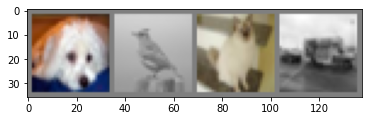

dog   bird  cat   truck


In [206]:
# get some random training images
dataiter_aug = iter(trainloader_aug)
images, labels = dataiter_aug.next()

#find the dimensions of a flattened image
print(torch.flatten(images, 1).size())
print(images.size())

# show images
# print labels
imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

## Part A: CNN vs Fully-Connected FF Performance on Image Classification Tasks

In [209]:
import torch.nn as nn
import torch.nn.functional as F


class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

class FFModel_0(nn.Module):
  def __init__(self):
      super().__init__()
      self.linear = nn.Linear(3072, 10)
      
  def forward(self, x):
    x = torch.flatten(x, 1)
    x = self.linear(x)
    return x

class FFModel_1(nn.Module):
  def __init__(self):
      super().__init__()
      self.linear = nn.Linear(3072, 512)
      self.linear1 = nn.Linear(512, 10)

      self.dropout = nn.Dropout(0.5)

  def forward(self, x):
    x = torch.flatten(x, 1)
    x = F.relu(self.linear(x))
    x = self.linear1(x)
    return x

class FFModel_2(nn.Module):
  def __init__(self):
      super().__init__()
      self.linear = nn.Linear(3072, 512)
      self.linear1 = nn.Linear(512, 512)
      self.linear2 = nn.Linear(512, 10)

      self.dropout = nn.Dropout(0.5)

  def forward(self, x):
    x = torch.flatten(x, 1)
    x = F.relu(self.linear(x))
    x = self.dropout(x)
    x = F.relu(self.linear1(x))
    x = self.linear2(x)
    return x

class FFModel_3(nn.Module):
  def __init__(self):
      super().__init__()
      self.linear = nn.Linear(3072, 512)
      self.linear1 = nn.Linear(512, 512)
      self.linear2 = nn.Linear(512, 512)
      self.linear3 = nn.Linear(512, 10)

      self.dropout = nn.Dropout(0.5)

  def forward(self, x):
    x = torch.flatten(x, 1)
    x = F.relu(self.linear(x))
    x = self.dropout(x)
    x = F.relu(self.linear1(x))
    x = self.dropout(x)
    x = F.relu(self.linear2(x))
    x = self.linear3(x)
    return x


class FFModel_4(nn.Module):
  def __init__(self):
      super().__init__()
      self.linear = nn.Linear(3072, 512)
      self.linear1 = nn.Linear(512, 512)
      self.linear2 = nn.Linear(512, 512)
      self.linear3 = nn.Linear(512, 512)
      self.linear4 = nn.Linear(512, 10)

      self.dropout = nn.Dropout(0.5)

  def forward(self, x):
    x = torch.flatten(x, 1)
    x = F.relu(self.linear(x))
    x = self.dropout(x)
    x = F.relu(self.linear1(x))
    x = self.dropout(x)
    x = F.relu(self.linear2(x))
    x = self.dropout(x)
    x = F.relu(self.linear3(x))
    x = self.linear4(x)
    return x



net = ConvNet()
ff_net_0 = FFModel_0()
ff_net_1 = FFModel_1()
ff_net_2 = FFModel_2()
ff_net_3 = FFModel_3()
ff_net_4 = FFModel_4()


## We define functions to evaluate the accuracy of any model on the training and testing dataset

In [210]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

def evaluate_model(model, dataset=testloader):
  correct = 0
  total = 0
  # since we're not training, we don't need to calculate the gradients for our outputs
  with torch.no_grad():
      for data in dataset:
          images, labels = data
          # calculate outputs by running images through the network
          outputs = model(images)
          # the class with the highest energy is what we choose as prediction
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()
  accuracy = 100 * correct // total
  return accuracy

def evaluate_model_train(model, dataset=trainloader):
  correct = 0
  total = 0
  # since we're not training, we don't need to calculate the gradients for our outputs
  with torch.no_grad():
      for data in dataset:
          images, labels = data
          # calculate outputs by running images through the network
          outputs = model(images)
          # the class with the highest energy is what we choose as prediction
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()
  accuracy = 100 * correct // total
  return accuracy

## Training the Base CNN

In [47]:
# CNN Training
cnn_epochs = []
cnn_accuracy = []
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

    accuracy = evaluate_model(net)
    cnn_accuracy.append(accuracy)
    print(accuracy)
    cnn_epochs.append(epoch + 1)


print('Finished Training')

[1,  2000] loss: 2.241
[1,  4000] loss: 1.912
[1,  6000] loss: 1.682
[1,  8000] loss: 1.593
[1, 10000] loss: 1.522
[1, 12000] loss: 1.470
47
[2,  2000] loss: 1.403
[2,  4000] loss: 1.376
[2,  6000] loss: 1.388
[2,  8000] loss: 1.337
[2, 10000] loss: 1.342
[2, 12000] loss: 1.320
52
[3,  2000] loss: 1.240
[3,  4000] loss: 1.217
[3,  6000] loss: 1.240
[3,  8000] loss: 1.227
[3, 10000] loss: 1.202
[3, 12000] loss: 1.213
58
[4,  2000] loss: 1.118
[4,  4000] loss: 1.152
[4,  6000] loss: 1.124
[4,  8000] loss: 1.129
[4, 10000] loss: 1.131
[4, 12000] loss: 1.111
59
[5,  2000] loss: 1.041
[5,  4000] loss: 1.060
[5,  6000] loss: 1.066
[5,  8000] loss: 1.054
[5, 10000] loss: 1.052
[5, 12000] loss: 1.051
60
[6,  2000] loss: 0.963
[6,  4000] loss: 0.981
[6,  6000] loss: 0.999
[6,  8000] loss: 1.008
[6, 10000] loss: 1.022
[6, 12000] loss: 1.001
59
[7,  2000] loss: 0.911
[7,  4000] loss: 0.933
[7,  6000] loss: 0.951
[7,  8000] loss: 0.960
[7, 10000] loss: 0.965
[7, 12000] loss: 0.960
61
[8,  2000] lo

In [49]:
# saving the trained CNN
import os
PATH = os.path.join(abspath_curr, '/cnn.pth')
torch.save(net.state_dict(), PATH)

In [50]:
net = ConvNet()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

## Training the Dense Feed-Forward Models
I developed a function so I could train the models all at once 
and automatically calculate the accuracy at each epoch without using a separate model.

In [211]:
def train_model(neural_net):  

  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(neural_net.parameters(), lr=0.001, momentum=0.9)

  epochs = []
  accuracy = [] 
  for epoch in range(10):  # loop over the dataset multiple times

      running_loss = 0.0
      for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = neural_net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
        
      accuracy.append(evaluate_model(neural_net))
      print(evaluate_model(neural_net))
      epochs.append(epoch + 1)

  print('Finished Training: ', neural_net)
  return epochs, accuracy

# Saving the results of the model
accuracy_scores = {}
for model, name in [(ff_net_0,"ff_net_0"), (ff_net_1,"ff_net_1"), (ff_net_2,"ff_net_2"), (ff_net_3,"ff_net_3"), (ff_net_4,"ff_net_4")]:
  accuracy, epochs = train_model(model)
  accuracy_scores[name] = [accuracy, epochs]

[1,  2000] loss: 2.181
[1,  4000] loss: 2.167
[1,  6000] loss: 2.154
[1,  8000] loss: 2.149
[1, 10000] loss: 2.149
[1, 12000] loss: 2.129
34
[2,  2000] loss: 2.063
[2,  4000] loss: 2.079
[2,  6000] loss: 2.114
[2,  8000] loss: 2.128
[2, 10000] loss: 2.130
[2, 12000] loss: 2.106
33
[3,  2000] loss: 2.055
[3,  4000] loss: 2.068
[3,  6000] loss: 2.047
[3,  8000] loss: 2.114
[3, 10000] loss: 2.108
[3, 12000] loss: 2.128
32
[4,  2000] loss: 2.048
[4,  4000] loss: 2.046
[4,  6000] loss: 2.063
[4,  8000] loss: 2.065
[4, 10000] loss: 2.079
[4, 12000] loss: 2.116
32
[5,  2000] loss: 1.991
[5,  4000] loss: 2.039
[5,  6000] loss: 2.074
[5,  8000] loss: 2.056
[5, 10000] loss: 2.084
[5, 12000] loss: 2.105
33
[6,  2000] loss: 2.024
[6,  4000] loss: 2.033
[6,  6000] loss: 2.060
[6,  8000] loss: 2.074
[6, 10000] loss: 2.076
[6, 12000] loss: 2.072
35
[7,  2000] loss: 2.004
[7,  4000] loss: 2.023
[7,  6000] loss: 2.066
[7,  8000] loss: 2.062
[7, 10000] loss: 2.066
[7, 12000] loss: 2.079
32
[8,  2000] lo

### Saving the Trained models

In [212]:
for model, name in [(ff_net_0,"ff_net_0"), (ff_net_1,"ff_net_1"), (ff_net_2,"ff_net_2"), (ff_net_3,"ff_net_3"), (ff_net_4,"ff_net_4")]:
  PATH = os.path.join(abspath_curr, f'/{name}.pth')
  torch.save(model.state_dict(), PATH)

### Saving all of the Scores in Dataframe to access later

In [213]:
scores = pd.DataFrame()
for model, name in [(ff_net_0,"ff_net_0"), (ff_net_1,"ff_net_1"), (ff_net_2,"ff_net_2"), (ff_net_3,"ff_net_3"), (ff_net_4,"ff_net_4")]:
  scores[name] = pd.Series(accuracy_scores[name][1]) 
scores['cnn'] = pd.Series(cnn_accuracy)
print(scores)
scores.to_pickle(os.path.join(abspath_curr, f'/scores.pkl'))

   ff_net_0  ff_net_1  ff_net_2  ff_net_3  ff_net_4  cnn
0        34        45        42        39        36   47
1        33        47        44        43        40   52
2        32        47        45        43        42   58
3        32        50        46        44        43   59
4        33        50        47        45        43   60
5        35        49        47        46        44   59
6        32        52        46        45        45   61
7        33        50        46        46        45   61
8        34        47        48        46        45   61
9        34        50        48        47        46   63


### Plot of the Results

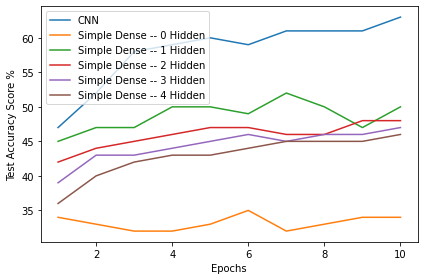

In [214]:
plt.plot(cnn_epochs, scores['cnn'], label = 'CNN')
plt.plot(cnn_epochs, scores['ff_net_0'], label = 'Simple Dense -- 0 Hidden')
plt.plot(cnn_epochs, scores['ff_net_1'], label = 'Simple Dense -- 1 Hidden')
plt.plot(cnn_epochs, scores['ff_net_2'], label = 'Simple Dense -- 2 Hidden')
plt.plot(cnn_epochs, scores['ff_net_3'], label = 'Simple Dense -- 3 Hidden')
plt.plot(cnn_epochs, scores['ff_net_4'], label = 'Simple Dense -- 4 Hidden')
plt.xlabel("Epochs")
plt.ylabel("Test Accuracy Score %")
plt.legend()
plt.tight_layout()
plt.show()

### Summary
We see that the CNN is the best performing model by far the best model, while the simple dense model with no hidden layers. The poor performance of the simple networks in general is likely due to the fact that they do not encapsulate local features as well as the CNN. Specifically for the model with no hidden layers, it treats all of the pixels as completely unrelated, but they are clearly related. The CNN captures this relationship between pixels more effectively.

## Part B: Sigmoid vs. ReLU Performance

### Defining the model with Sigmoid Activations

In [77]:
class ConvNet_Sigmoid(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(torch.sigmoid(self.conv1(x)))
        x = self.pool(torch.sigmoid(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        x = self.fc3(x)
        return x

conv_sigmoid = ConvNet_Sigmoid()

### Training the Sigmoid CNN
The learning rate is increased to 0.01 since the the sigmoid tends to train slower due to the likely scenario of derivatives close to 0.

In [79]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(conv_sigmoid.parameters(), lr=0.01, momentum=0.9)

# CNN Training
cnn_sig_epochs = []
cnn_sig_accuracy = []
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = conv_sigmoid(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

    accuracy = evaluate_model(conv_sigmoid)
    cnn_sig_accuracy.append(accuracy)
    print(accuracy)
    cnn_sig_epochs.append(epoch + 1)


print('Finished Training')

[1,  2000] loss: 2.315
[1,  4000] loss: 2.310
[1,  6000] loss: 2.308
[1,  8000] loss: 2.309
[1, 10000] loss: 2.308
[1, 12000] loss: 2.308
10
[2,  2000] loss: 2.293
[2,  4000] loss: 2.126
[2,  6000] loss: 2.085
[2,  8000] loss: 2.040
[2, 10000] loss: 1.967
[2, 12000] loss: 1.858
28
[3,  2000] loss: 1.801
[3,  4000] loss: 1.766
[3,  6000] loss: 1.735
[3,  8000] loss: 1.688
[3, 10000] loss: 1.628
[3, 12000] loss: 1.562
43
[4,  2000] loss: 1.529
[4,  4000] loss: 1.488
[4,  6000] loss: 1.466
[4,  8000] loss: 1.429
[4, 10000] loss: 1.439
[4, 12000] loss: 1.401
46
[5,  2000] loss: 1.369
[5,  4000] loss: 1.369
[5,  6000] loss: 1.368
[5,  8000] loss: 1.339
[5, 10000] loss: 1.336
[5, 12000] loss: 1.321
50
[6,  2000] loss: 1.296
[6,  4000] loss: 1.285
[6,  6000] loss: 1.287
[6,  8000] loss: 1.261
[6, 10000] loss: 1.247
[6, 12000] loss: 1.267
53
[7,  2000] loss: 1.205
[7,  4000] loss: 1.225
[7,  6000] loss: 1.228
[7,  8000] loss: 1.214
[7, 10000] loss: 1.205
[7, 12000] loss: 1.192
56
[8,  2000] lo

### Saving the trained model and adding the score to the dataframe.

In [80]:
scores['cnn_sig'] = pd.Series(cnn_sig_accuracy)
scores.to_pickle(os.path.join(abspath_curr, f'/scores.pkl'))

PATH = os.path.join(abspath_curr, '/cnn_sig.pth')
torch.save(conv_sigmoid.state_dict(), PATH)

### Plot of the results

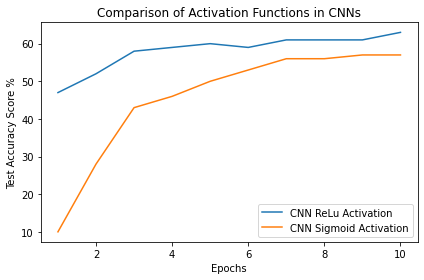

In [82]:
plt.plot(cnn_epochs, scores['cnn'], label = 'CNN ReLu Activation')
plt.plot(cnn_epochs, scores['cnn_sig'], label = 'CNN Sigmoid Activation')

plt.xlabel("Epochs")
plt.ylabel("Test Accuracy Score %")
plt.title("Comparison of Activation Functions in CNNs")
plt.legend()
plt.tight_layout()
plt.show()

### Summary
The CNN with ReLU activation likely performed better than the model with Sigmoid Activation because the sigmoid function is more prone to vanishing gradients and is less likely to created sparse networks (meaning more of the weights are zero, which is good for efficiency). I tried to improve the issue with the vanishing gradient by increasing the learning rate, but the ReLU model was still better.

## Part C: Data Augmentation and Dropout
### Defining a CNN with dropout in the linear layers

In [215]:
class ConvNetDrop(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
conv_net = ConvNet()
conv_net_drop = ConvNetDrop()


### Training the models with and without dropout

In [216]:
def train_model(neural_net):  

  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(neural_net.parameters(), lr=0.001, momentum=0.9)

  epochs = []
  test_accuracy = []
  train_accuracy = [] 
  for epoch in range(15):  # loop over the dataset multiple times

      running_loss = 0.0
      for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = neural_net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

      train_score = evaluate_model_train(neural_net)
      test_score = evaluate_model(neural_net)
      test_accuracy.append(test_score)
      train_accuracy.append(train_score)
      print(test_score)
      print(train_score)
      epochs.append(epoch + 1)

  print('Finished Training: ', neural_net)
  return test_accuracy, train_accuracy

accuracy_scores = {}
for model, name in [(conv_net,"NoAug_NoDrop"), (conv_net_drop, "NoAug_Drop")]:
  test_accuracy, train_accuracy = train_model(model)
  accuracy_scores[name] = [train_accuracy, test_accuracy]

[1,  2000] loss: 2.205
[1,  4000] loss: 1.885
[1,  6000] loss: 1.703
[1,  8000] loss: 1.589
[1, 10000] loss: 1.541
[1, 12000] loss: 1.480
48
48
[2,  2000] loss: 1.410
[2,  4000] loss: 1.357
[2,  6000] loss: 1.323
[2,  8000] loss: 1.337
[2, 10000] loss: 1.318
[2, 12000] loss: 1.274
55
56
[3,  2000] loss: 1.205
[3,  4000] loss: 1.212
[3,  6000] loss: 1.207
[3,  8000] loss: 1.200
[3, 10000] loss: 1.165
[3, 12000] loss: 1.159
58
61
[4,  2000] loss: 1.073
[4,  4000] loss: 1.118
[4,  6000] loss: 1.092
[4,  8000] loss: 1.087
[4, 10000] loss: 1.092
[4, 12000] loss: 1.102
60
65
[5,  2000] loss: 0.996
[5,  4000] loss: 1.040
[5,  6000] loss: 1.014
[5,  8000] loss: 1.019
[5, 10000] loss: 1.034
[5, 12000] loss: 1.046
60
66
[6,  2000] loss: 0.948
[6,  4000] loss: 0.966
[6,  6000] loss: 0.970
[6,  8000] loss: 0.966
[6, 10000] loss: 0.960
[6, 12000] loss: 0.984
62
68
[7,  2000] loss: 0.892
[7,  4000] loss: 0.911
[7,  6000] loss: 0.915
[7,  8000] loss: 0.941
[7, 10000] loss: 0.937
[7, 12000] loss: 0.93

### Saving Scores

In [217]:
for model, name in [(conv_net,"NoAug_NoDrop"), (conv_net_drop, "NoAug_Drop")]:
  PATH = os.path.join(abspath_curr, f'/{name}.pth')
  torch.save(model.state_dict(), PATH)

In [218]:
cnn_scores = pd.DataFrame()
for model, name in [(conv_net,"NoAug_NoDrop"), (conv_net_drop, "NoAug_Drop")]:
  cnn_scores[name + "Train"] = pd.Series(accuracy_scores[name][0]) 
  cnn_scores[name + "Test"] = pd.Series(accuracy_scores[name][1]) 
print(cnn_scores)
cnn_scores.to_pickle(os.path.join(abspath_curr, f'/cnn_scores.pkl'))

    NoAug_NoDropTrain  NoAug_NoDropTest  NoAug_DropTrain  NoAug_DropTest
0                  48                48               41              41
1                  56                55               46              45
2                  61                58               53              52
3                  65                60               53              52
4                  66                60               56              54
5                  68                62               57              54
6                  70                62               59              56
7                  72                64               60              57
8                  72                63               59              56
9                  73                62               61              57
10                 73                61               61              58
11                 74                61               61              58
12                 73                61            

### Training the models on the augmented data

In [219]:
conv_net_aug = ConvNet()
conv_net_drop_aug = ConvNetDrop()

In [220]:
def train_model(neural_net):  

  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(neural_net.parameters(), lr=0.001, momentum=0.9)

  epochs = []
  test_accuracy = []
  train_accuracy = [] 
  for epoch in range(15):  # loop over the dataset multiple times

      running_loss = 0.0
      for i, data in enumerate(trainloader_aug, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = neural_net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

      train_score = evaluate_model_train(neural_net, dataset=trainloader_aug)
      test_score = evaluate_model(neural_net, dataset=testloader_aug)
      test_accuracy.append(test_score)
      train_accuracy.append(train_score)
      print(test_score)
      print(train_score)
      epochs.append(epoch + 1)

  print('Finished Training: ', neural_net)
  return test_accuracy, train_accuracy

accuracy_scores = {}
for model, name in [(conv_net_aug,"Aug_NoDrop"), (conv_net_drop_aug, "Aug_Drop")]:
  test_accuracy, train_accuracy = train_model(model)
  accuracy_scores[name] = [train_accuracy, test_accuracy]

[1,  2000] loss: 2.241
[1,  4000] loss: 1.983
[1,  6000] loss: 1.799
[1,  8000] loss: 1.654
[1, 10000] loss: 1.615
[1, 12000] loss: 1.543
46
45
[2,  2000] loss: 1.470
[2,  4000] loss: 1.464
[2,  6000] loss: 1.416
[2,  8000] loss: 1.383
[2, 10000] loss: 1.368
[2, 12000] loss: 1.353
54
53
[3,  2000] loss: 1.300
[3,  4000] loss: 1.311
[3,  6000] loss: 1.243
[3,  8000] loss: 1.273
[3, 10000] loss: 1.246
[3, 12000] loss: 1.230
57
57
[4,  2000] loss: 1.196
[4,  4000] loss: 1.163
[4,  6000] loss: 1.186
[4,  8000] loss: 1.162
[4, 10000] loss: 1.161
[4, 12000] loss: 1.140
60
61
[5,  2000] loss: 1.122
[5,  4000] loss: 1.117
[5,  6000] loss: 1.115
[5,  8000] loss: 1.078
[5, 10000] loss: 1.099
[5, 12000] loss: 1.086
62
64
[6,  2000] loss: 1.048
[6,  4000] loss: 1.062
[6,  6000] loss: 1.054
[6,  8000] loss: 1.048
[6, 10000] loss: 1.051
[6, 12000] loss: 1.072
62
63
[7,  2000] loss: 0.984
[7,  4000] loss: 1.025
[7,  6000] loss: 1.008
[7,  8000] loss: 1.027
[7, 10000] loss: 1.042
[7, 12000] loss: 1.02

### Saving the Models and Scores

In [221]:
for model, name in [(conv_net_aug,"Aug_NoDrop"), (conv_net_drop_aug, "Aug_Drop")]:
  PATH = os.path.join(abspath_curr, f'/{name}.pth')
  torch.save(model.state_dict(), PATH)

In [222]:
for model, name in [(conv_net_aug,"Aug_NoDrop"), (conv_net_drop_aug, "Aug_Drop")]:
  cnn_scores[name + "Train"] = pd.Series(accuracy_scores[name][0]) 
  cnn_scores[name + "Test"] = pd.Series(accuracy_scores[name][1]) 
print(cnn_scores)
cnn_scores.to_pickle(os.path.join(abspath_curr, f'/cnn_scores.pkl'))

    NoAug_NoDropTrain  NoAug_NoDropTest  NoAug_DropTrain  NoAug_DropTest  \
0                  48                48               41              41   
1                  56                55               46              45   
2                  61                58               53              52   
3                  65                60               53              52   
4                  66                60               56              54   
5                  68                62               57              54   
6                  70                62               59              56   
7                  72                64               60              57   
8                  72                63               59              56   
9                  73                62               61              57   
10                 73                61               61              58   
11                 74                61               61              58   
12          

In [226]:
cnn_scores = pd.read_pickle(os.path.join(abspath_curr, f'/cnn_scores.pkl'))
cnn_scores.head()

,NoAug_NoDropTrain,NoAug_NoDropTest,NoAug_DropTrain,NoAug_DropTest,Aug_NoDropTrain,Aug_NoDropTest,Aug_DropTrain,Aug_DropTest
0,48,48,41,41,45,46,41,41
1,56,55,46,45,53,54,46,46
2,61,58,53,52,57,57,51,51
3,65,60,53,52,61,60,51,51
4,66,60,56,54,64,62,56,56


### Plots of the Results

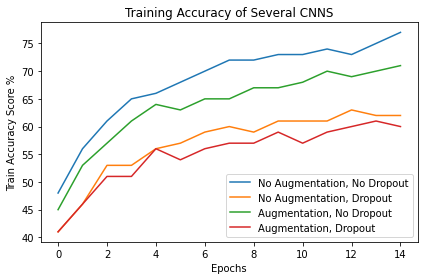

In [227]:
# Plotting the training performance
plt.plot(cnn_scores['NoAug_NoDropTrain'], label = 'No Augmentation, No Dropout')
plt.plot(cnn_scores['NoAug_DropTrain'], label = 'No Augmentation, Dropout')
plt.plot(cnn_scores['Aug_NoDropTrain'], label = 'Augmentation, No Dropout')
plt.plot(cnn_scores['Aug_DropTrain'], label = 'Augmentation, Dropout')

plt.xlabel("Epochs")
plt.ylabel("Train Accuracy Score %")
plt.legend()
plt.title("Training Accuracy of Several CNNS")
plt.tight_layout()
plt.show()

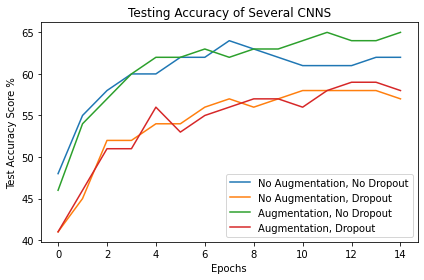

In [228]:
# Plotting the training performance
plt.plot(cnn_scores['NoAug_NoDropTest'], label = 'No Augmentation, No Dropout')
plt.plot(cnn_scores['NoAug_DropTest'], label = 'No Augmentation, Dropout')
plt.plot(cnn_scores['Aug_NoDropTest'], label = 'Augmentation, No Dropout')
plt.plot(cnn_scores['Aug_DropTest'], label = 'Augmentation, Dropout')

plt.xlabel("Epochs")
plt.ylabel("Test Accuracy Score %")
plt.legend()
plt.title("Testing Accuracy of Several CNNS")
plt.tight_layout()
plt.show()

### Summary of the Results
We observe two different trends in the graphs. The training accuracy seems to keep increasing with each epoch for both of the models without dropout. However, for both of the models trained with data augmentation we see worse training performance but better generalization to the testing set. This is likely because the grayscale and horizontal flips make it harder for the models to "learn" the training set, but makes them better at "learning" more relevant features of the images. Intuitively this makes sense since most of the time whether or not an image is in black and white or flipped horizontally does not impact a human's ability to classify images. For example, it's possible for a machine to erroneously learn that all frogs must be green, but we would hope that the machine could still learn to classify frogs that are viable, yet less common colors, like brown. We expect to see the trend hold as we keep increasing the number of epochs.